In [1]:
# Imports
from env import host, user, password
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind

import wrangle as w
import explore as e

np.random.seed(42)

In [2]:
df = w.wrangle_zillow()
train, validate, test = w.split_function(df)
to_scale = ['bathrooms', 'bedrooms', 'squarefeet', 'lotsize_sqft', 'year']
train_scaled, validate_scaled, test_scaled = w.get_minmax_scaled(train, validate, test, to_scale)

csv file found and read
Prepared df: (47949, 10)

Train: (28769, 10)
Validate: (9590, 10)
Test: (9590, 10)


In [3]:
train.head()

,property_value,bathrooms,bedrooms,has_pool,squarefeet,lotsize_sqft,year,county,county_Orange,county_Ventura
46866,476000,2.0,3,0,1606,6447,1955,LA,0,0
43125,567337,2.5,4,1,2642,7912,1977,Orange,1,0
38231,419390,1.0,2,0,924,7155,1948,LA,0,0
20644,409000,1.0,3,0,1402,7165,1953,LA,0,0
46076,342514,3.0,4,0,2826,23650,1978,Orange,1,0


# Initial visualizations of features vs target

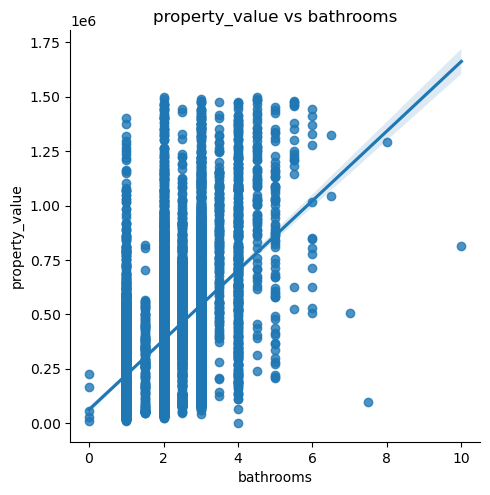

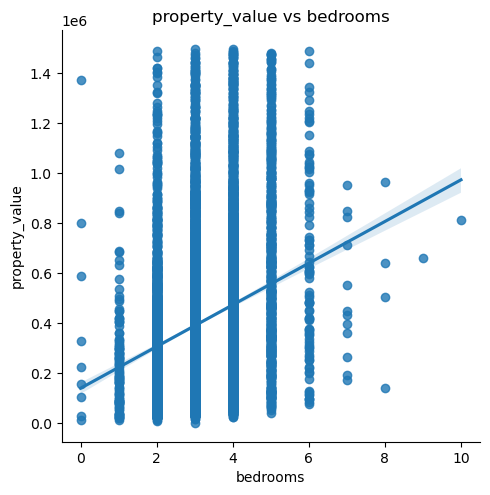

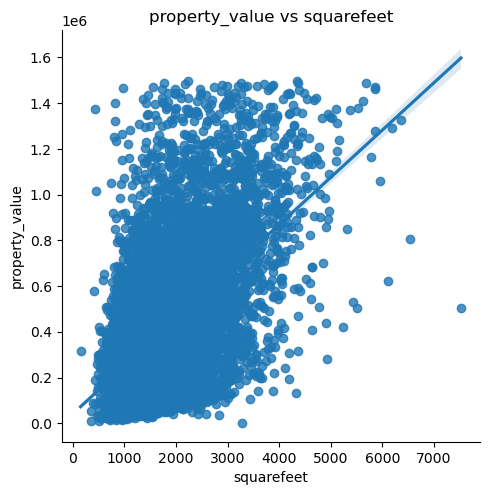

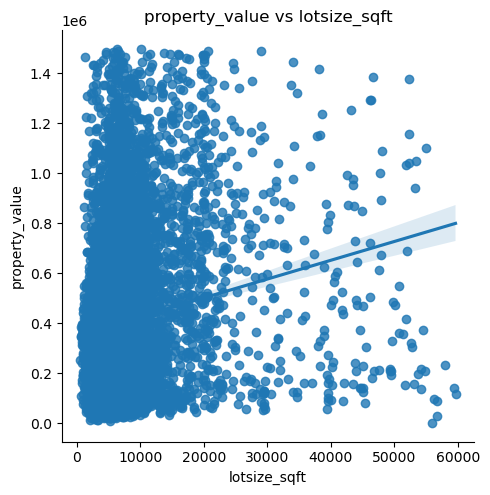

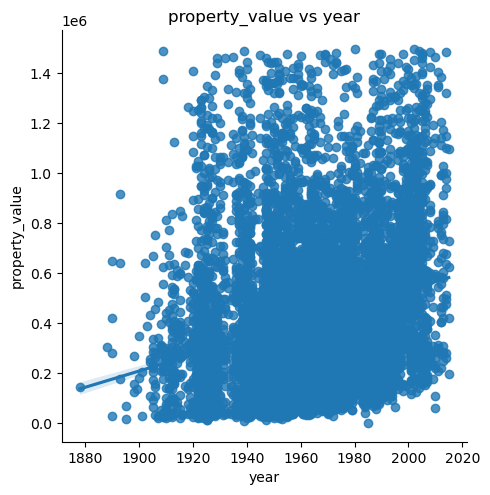

In [4]:
cont_cols = ['bathrooms', 'bedrooms', 'squarefeet', 'lotsize_sqft', 'year', 'property_value']
cat_cols = ['has_pool', 'county']
e.plot_variable_pairs(train, cont_cols)

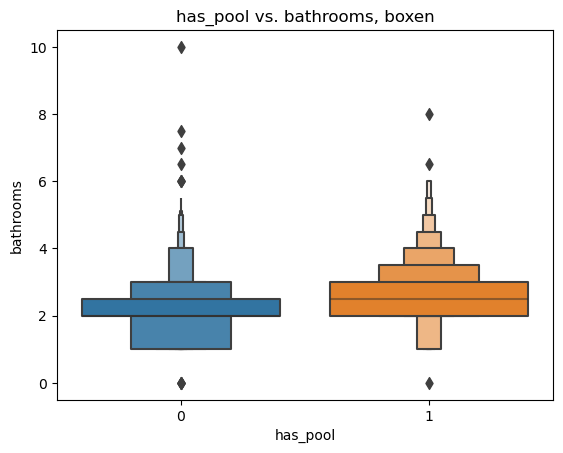

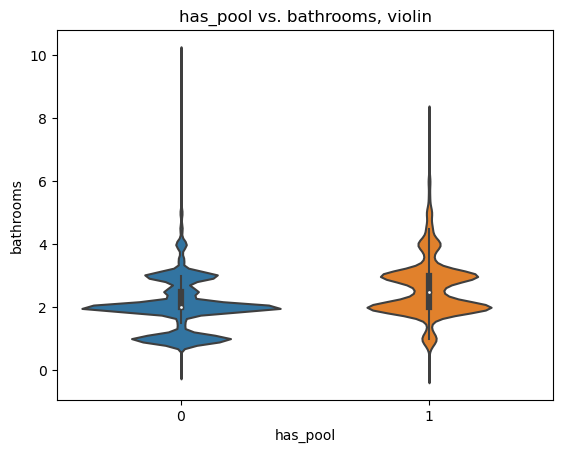

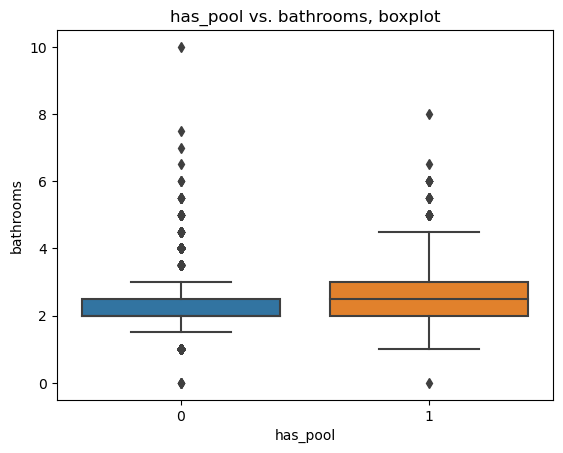

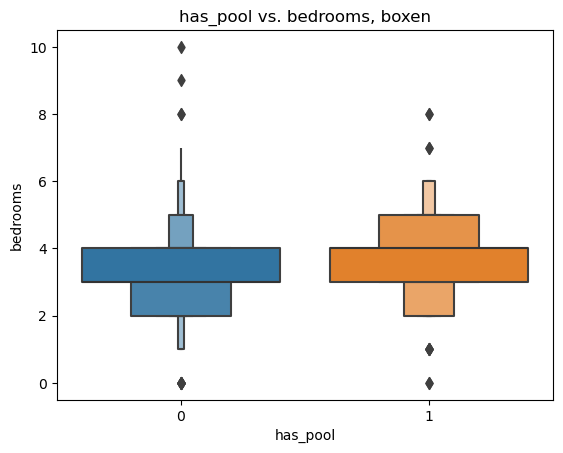

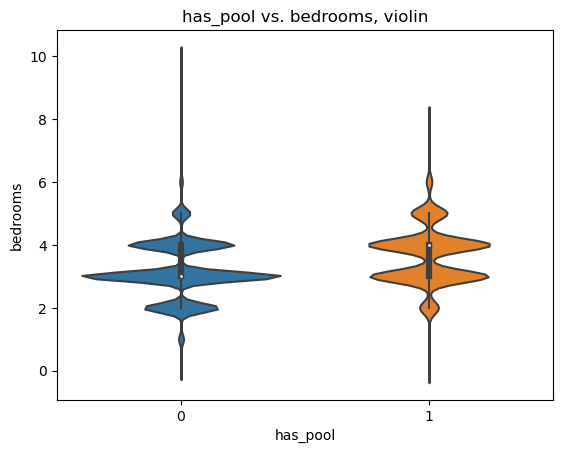

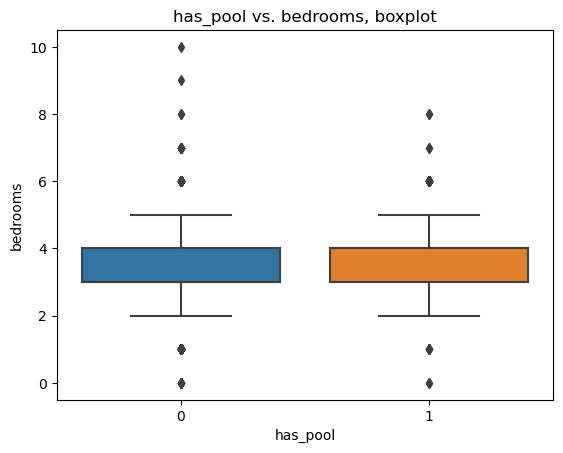

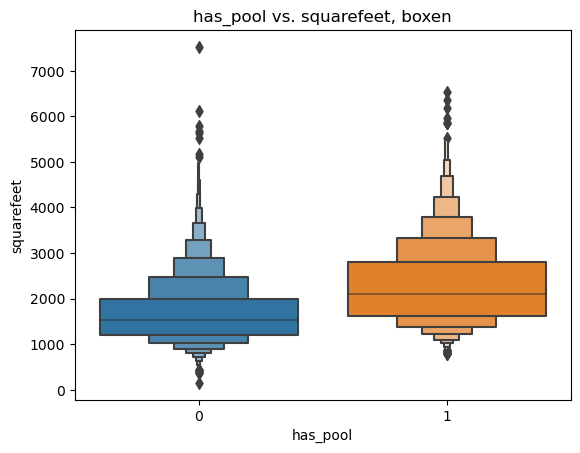

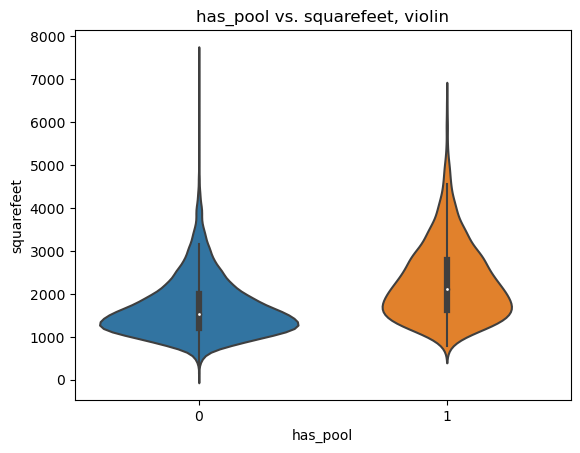

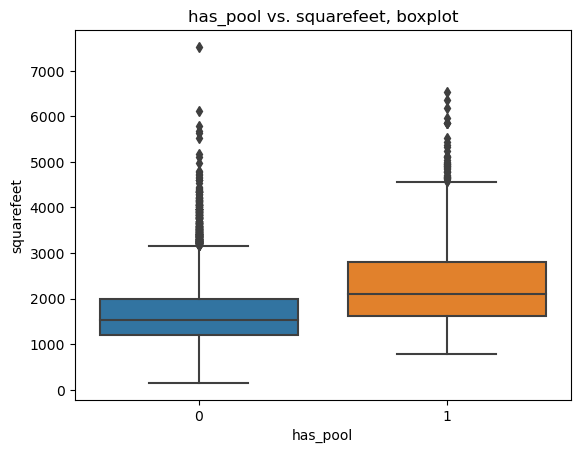

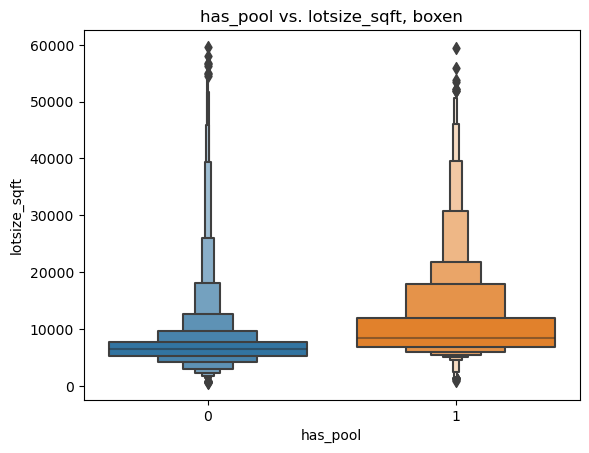

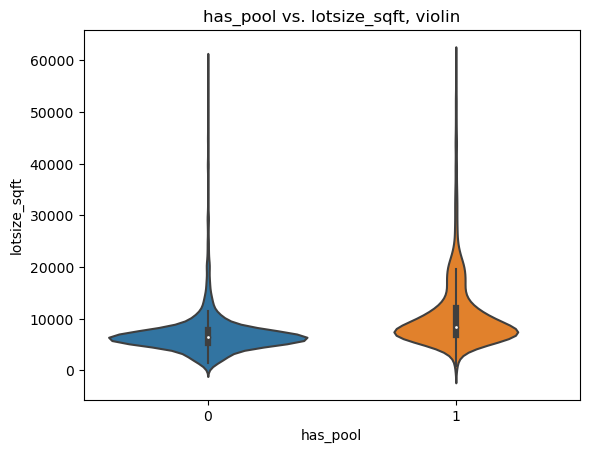

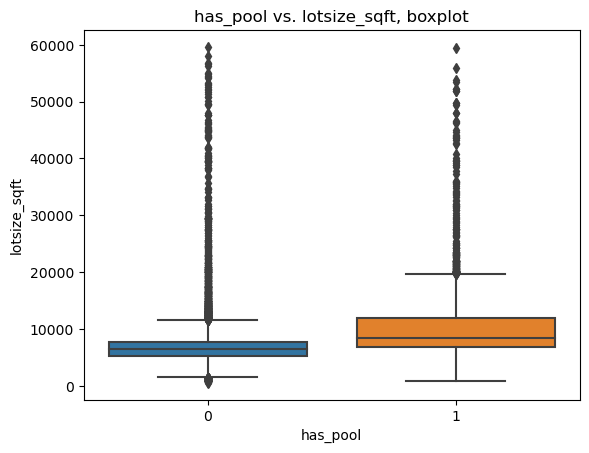

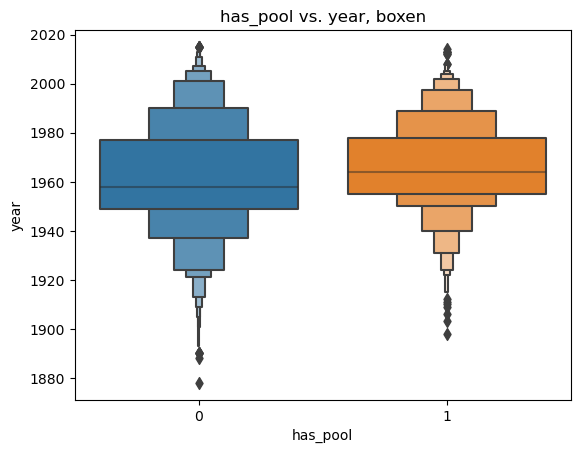

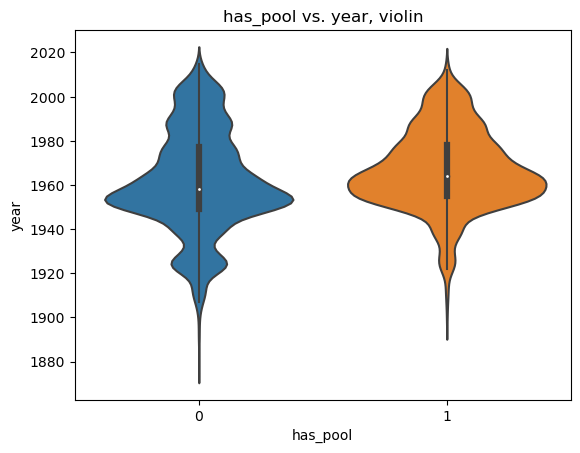

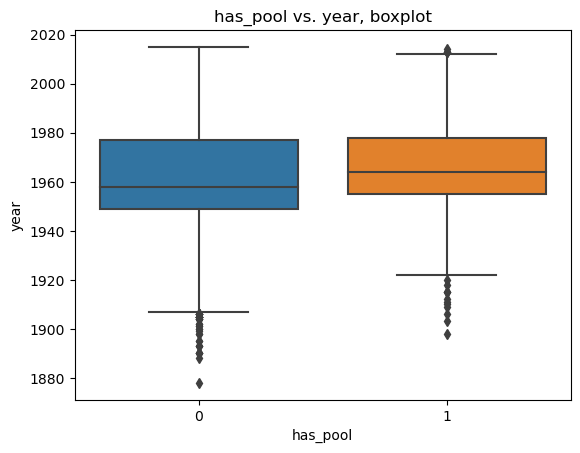

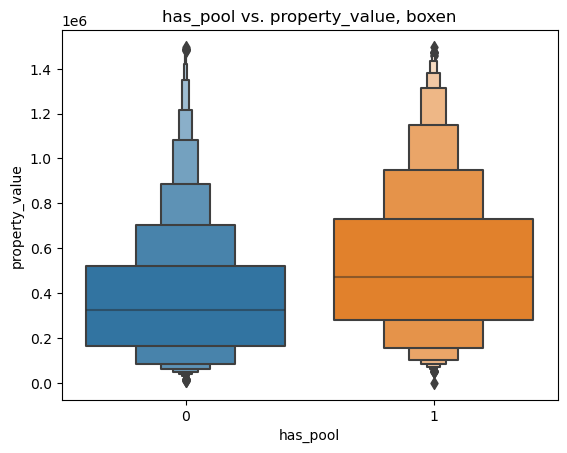

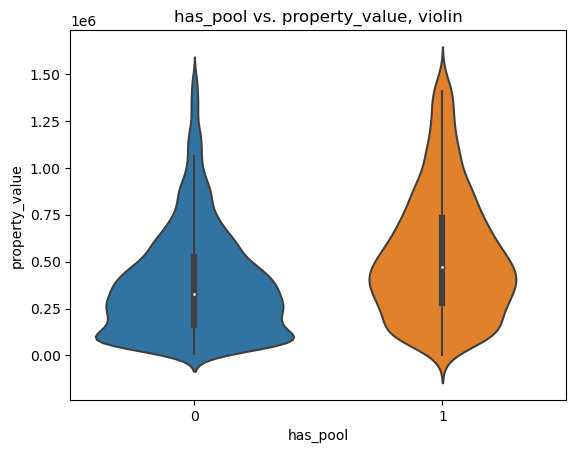

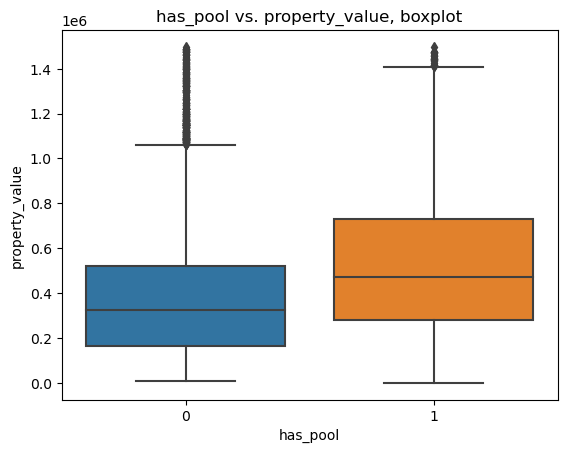

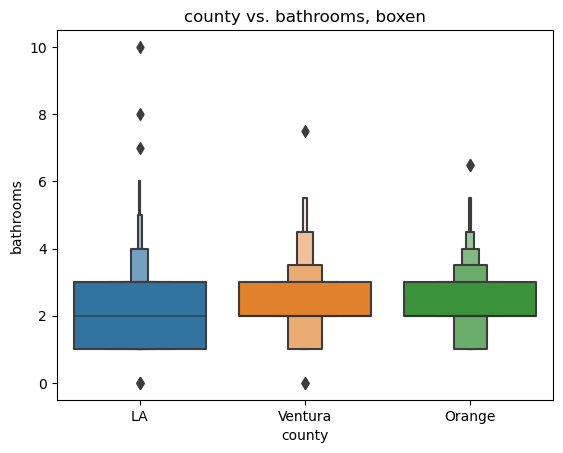

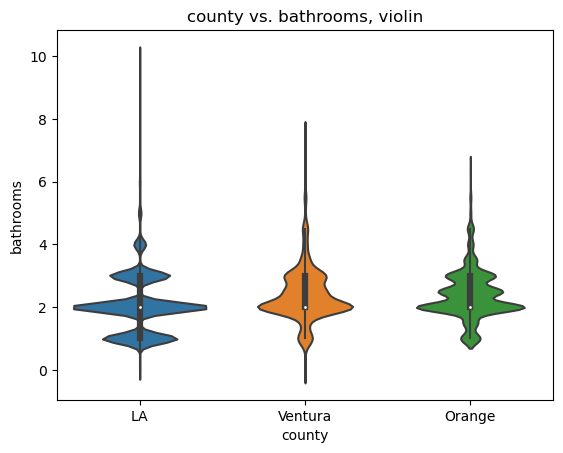

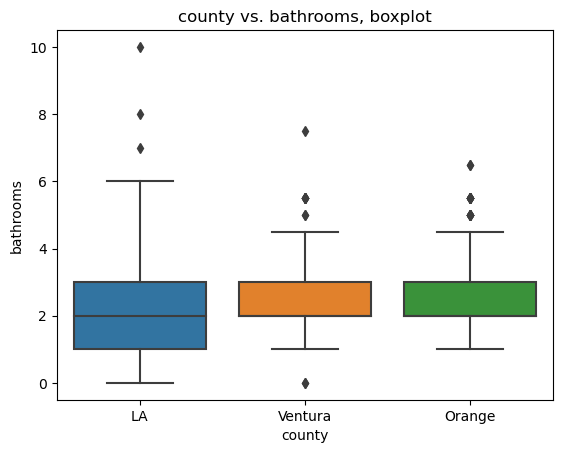

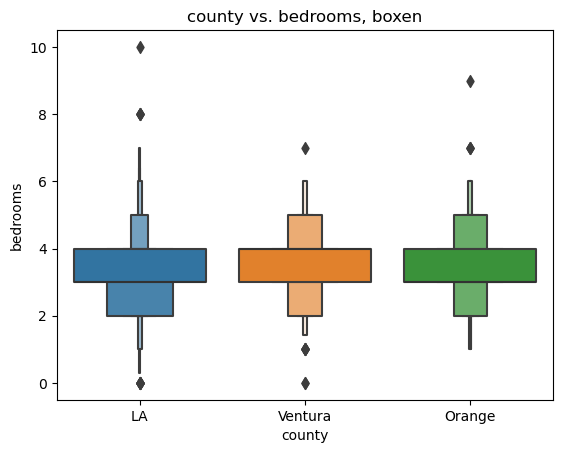

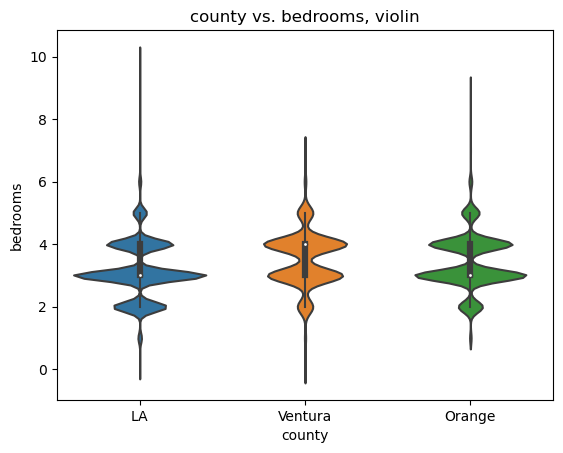

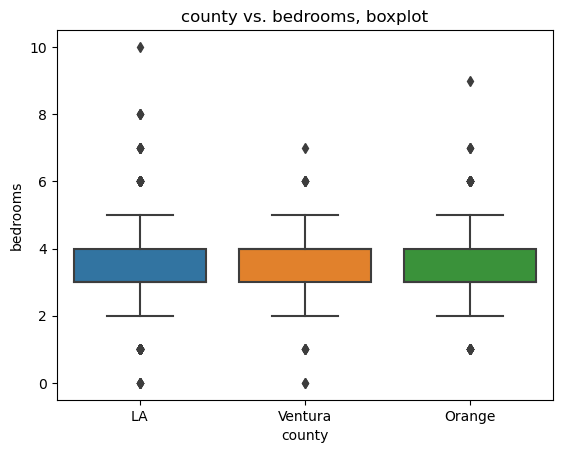

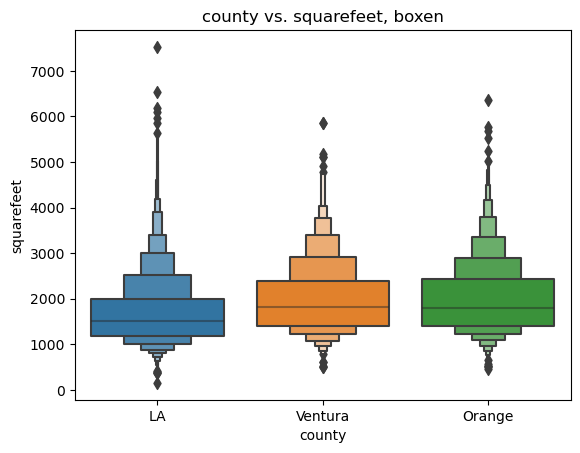

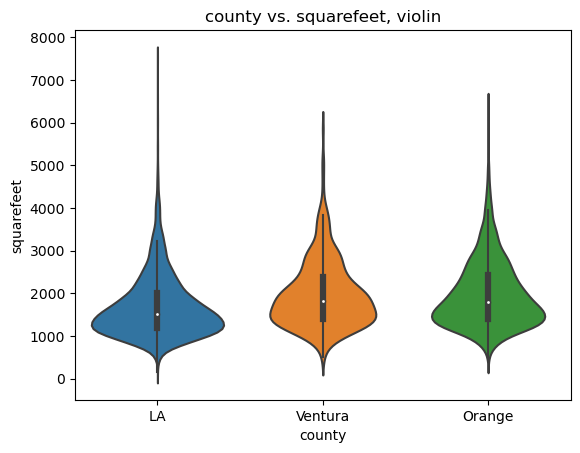

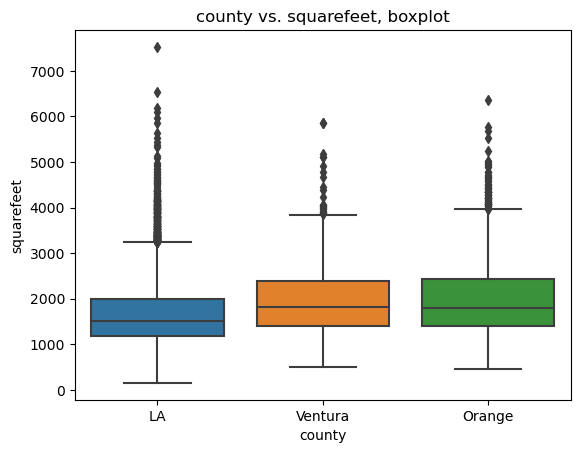

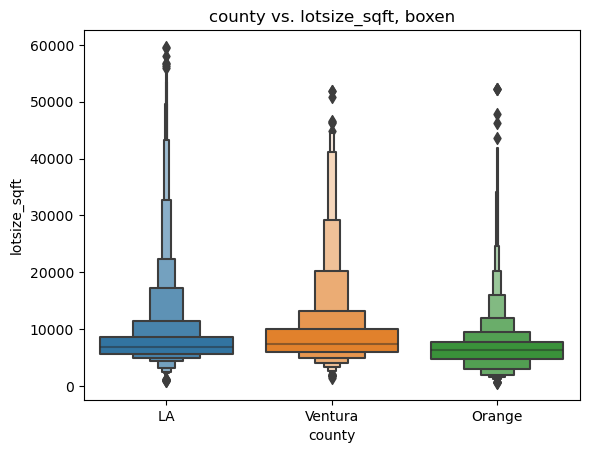

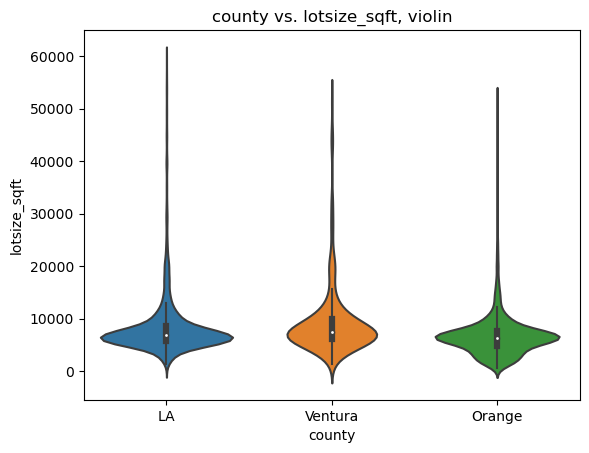

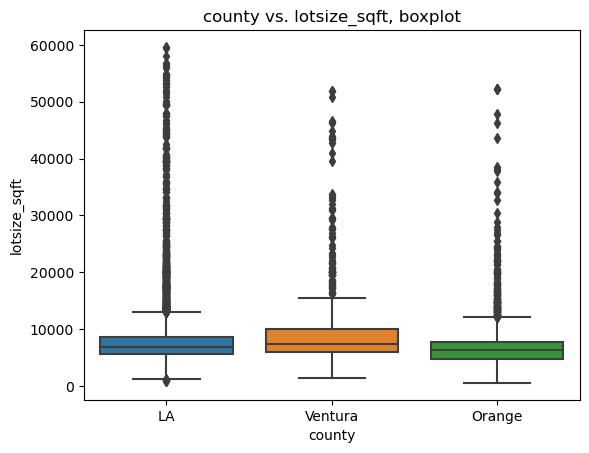

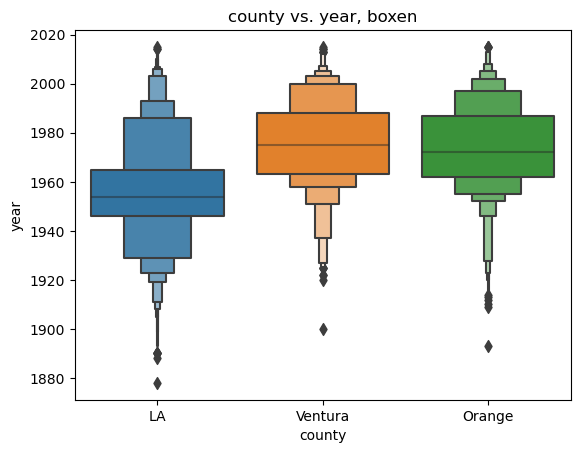

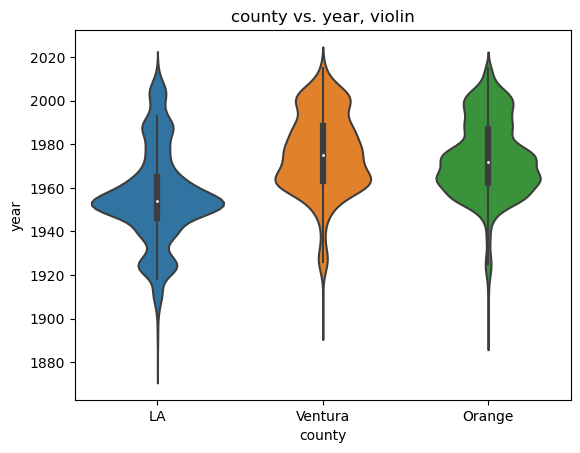

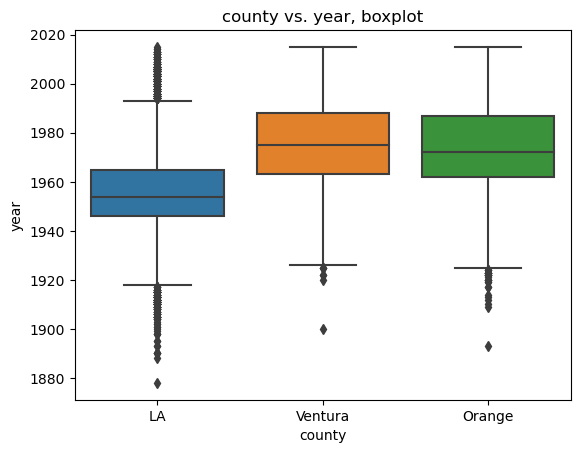

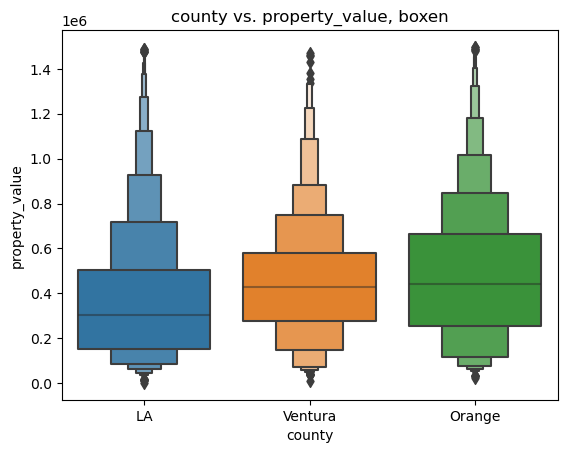

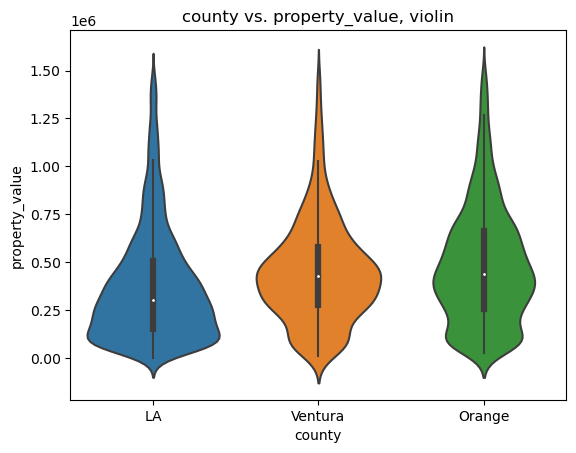

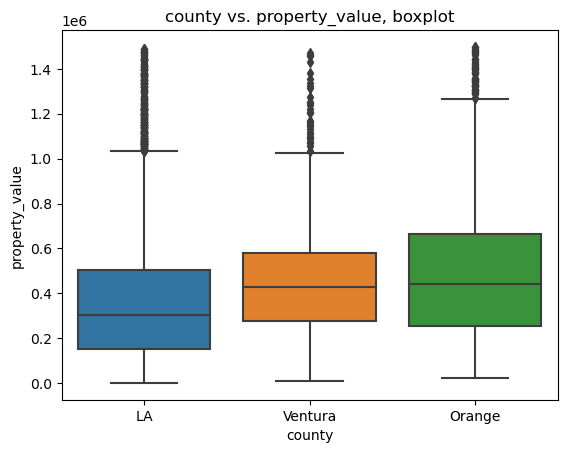

In [5]:
e.plot_categorical_and_continuous_vars(train, cont_cols, cat_cols) 

In [6]:
# make corr with default value (method=pearson) due to normal distribution of our variables
# NOTE: Misty said spearman is better for discrete variables, like say bedrooms and bathrooms
zillow_corr = train[cont_cols].corr()
zillow_corr


,bathrooms,bedrooms,squarefeet,lotsize_sqft,year,property_value
bathrooms,1.000000,0.624228,0.816963,0.250953,0.536962,0.460496
bedrooms,0.624228,1.000000,0.632519,0.188809,0.375076,0.254847
squarefeet,0.816963,0.632519,1.000000,0.357863,0.475418,0.531067
lotsize_sqft,0.250953,0.188809,0.357863,1.000000,0.083189,0.152175
year,0.536962,0.375076,0.475418,0.083189,1.000000,0.248008
property_value,0.460496,0.254847,0.531067,0.152175,0.248008,1.000000


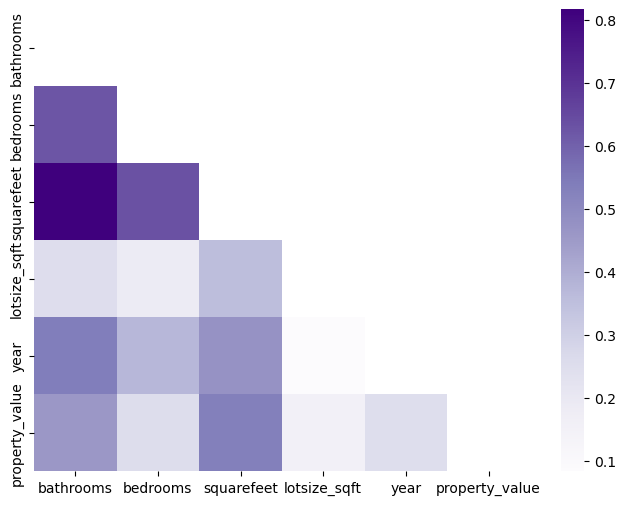

In [7]:
# Next, pass correlation matrix to sns.heatmap
plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Purples', mask=np.triu(zillow_corr))
plt.show()

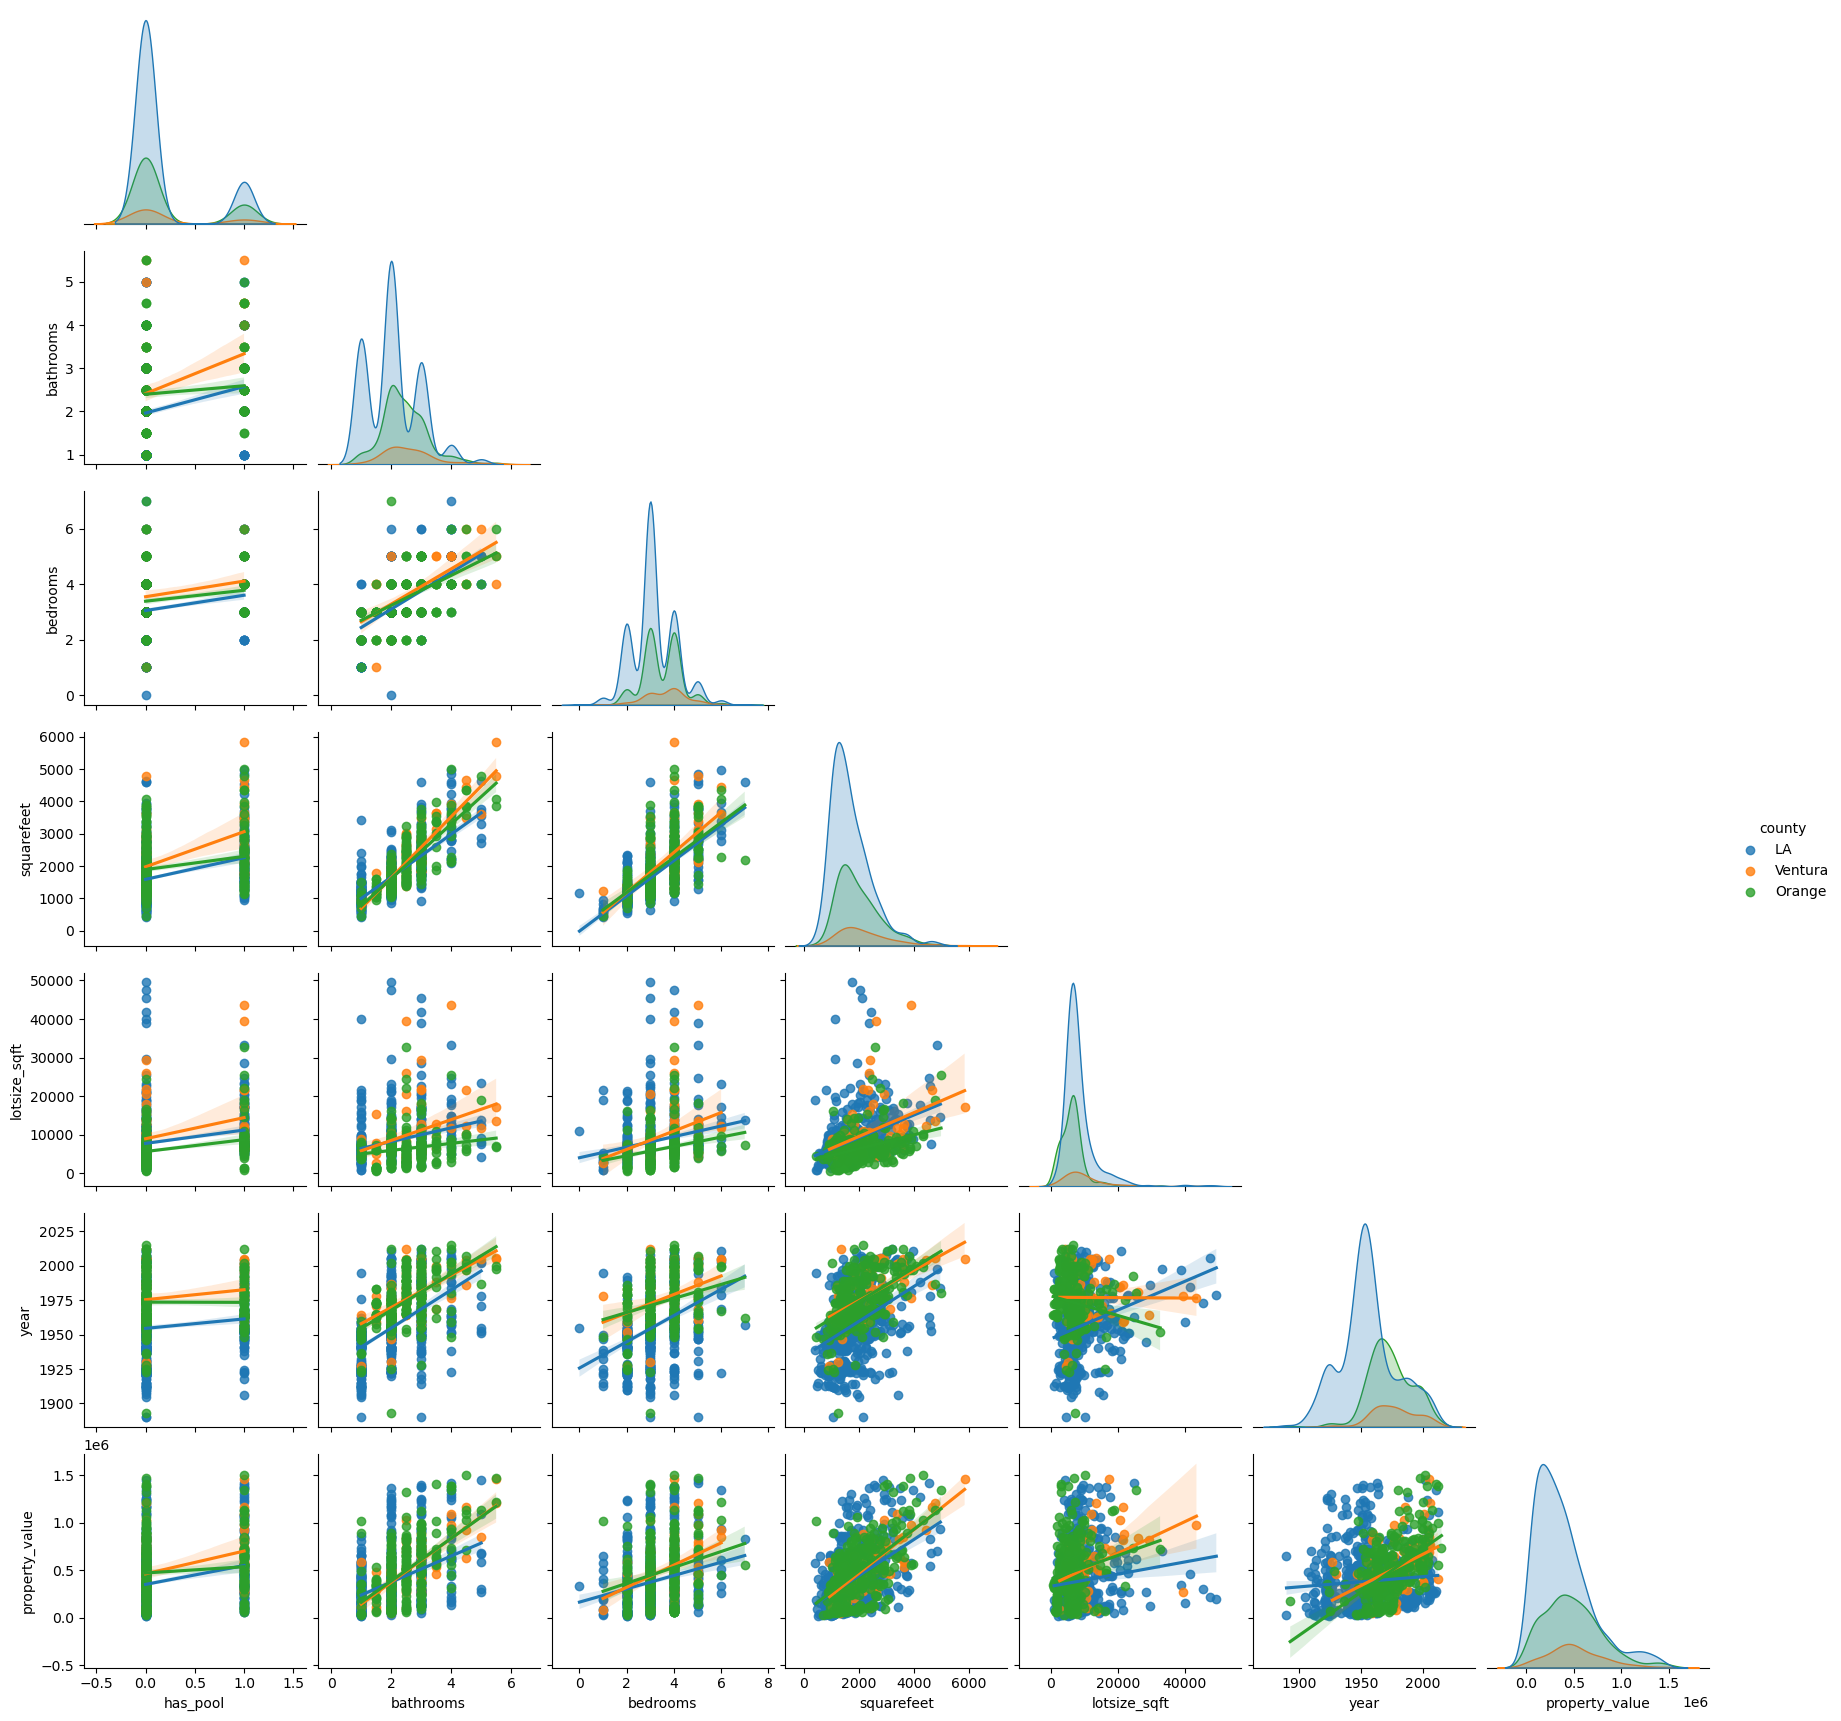

In [8]:
# if i want hue='county', i have to add county back into my cols
sns.pairplot(data=train[cat_cols + cont_cols].sample(1000), kind='reg', corner=True, hue='county')
plt.show()

## Initial hypotheses:
### - Reference correlation coefficients
#### - target hypotheses: square_feet and bathrooms are strongly correlated with property_value
#### - target hypotheses: bedrooms, year, and lotsize_sqft AND has_pool are less strongly correlated with property_value
#### - feature hypotheses: bedrooms, bathrooms, square_feet, and year are correlated with each other
#### - feature hypotheses: lotsize_sqft is correlated slightly with all but year

#### - feature: county has a low correlation if any to any other variable

## Analyze square_feet vs property_value with stats
- $H_0$: There is NO relationship between squarefeet and property_value
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize pearsonr - we are comparing continuous variables, normally distributed

### Visualize

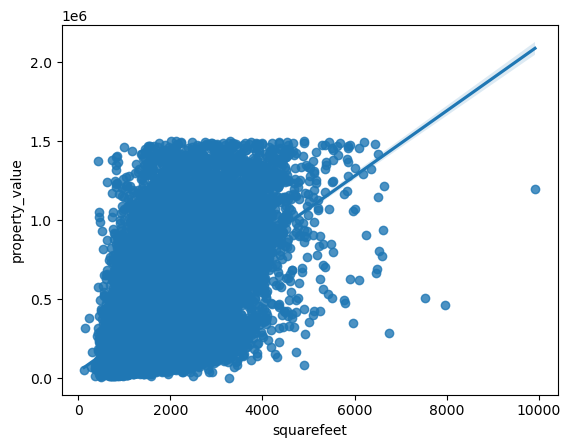

In [38]:
sns.regplot(data=train, x='squarefeet', y='property_value')
plt.show()

### Analyze with statistics
- Utilize pearsonr - we are comparing continuous variables, normally distributed

In [39]:
t, p = pearsonr(train.squarefeet, train.property_value)
t, p

(0.5310665469093112, 0.0)

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between squarefeet and property_value

## Analyze bathrooms vs property_value with stats
- $H_0$: There is NO relationship between bathrooms and property_value
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize pearsonr - we are comparing continuous variables, normally distributed
        - Note: one could argue bathrooms is categorical, OR one could make a separate has_half_bath feature, which I'm considering after MVP

### Visualize

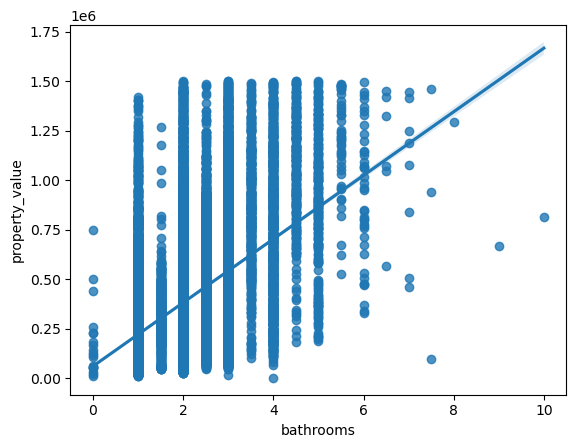

In [40]:
sns.regplot(data=train, x='bathrooms', y='property_value')
plt.show()

### Analyze with statistics
- Utilize pearsonr - we are comparing continuous variables, normally distributed

In [41]:
t, p = pearsonr(train.bathrooms, train.property_value)
t, p

(0.4604958756677789, 0.0)

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between bathrooms and property_value

## Analyze bedrooms vs property_value with stats
- $H_0$: There is NO relationship between bedrooms and property_value
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize pearsonr - we are comparing continuous variables, normally distributed

### Visualize

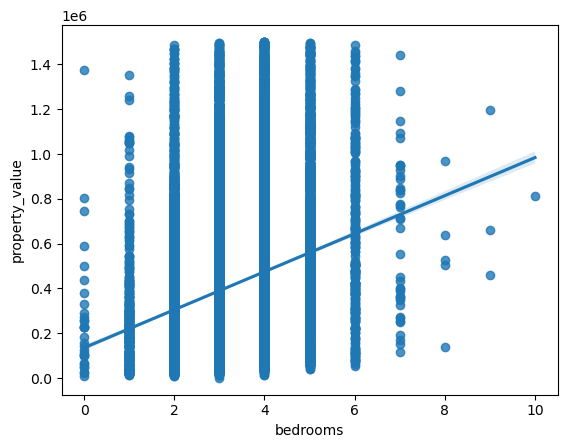

In [43]:
sns.regplot(data=train, x='bedrooms', y='property_value')
plt.show()

### Analyze with statistics
- Utilize pearsonr - we are comparing continuous variables, normally distributed

In [42]:
t, p = pearsonr(train.bedrooms, train.property_value)
t, p

(0.2548469265877826, 0.0)

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between bathrooms and property_value

## Analyze lotsize_sqft vs property_value with stats
- $H_0$: There is NO relationship between lotsize_sqft and property_value
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize pearsonr - we are comparing continuous variables, normally distributed

### Visualize

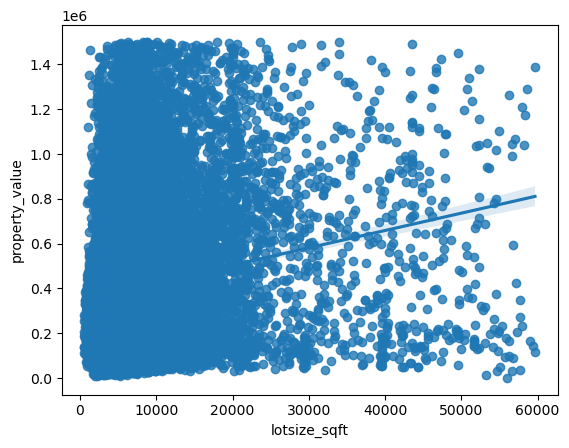

In [44]:
sns.regplot(data=train, x='lotsize_sqft', y='property_value')
plt.show()

### Analyze with statistics
- Utilize pearsonr - we are comparing continuous variables, normally distributed

In [45]:
t, p = pearsonr(train.lotsize_sqft, train.property_value)
t, p

(0.1521746779948362, 1.3590171613605549e-148)

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between lotsize_sqft and property_value

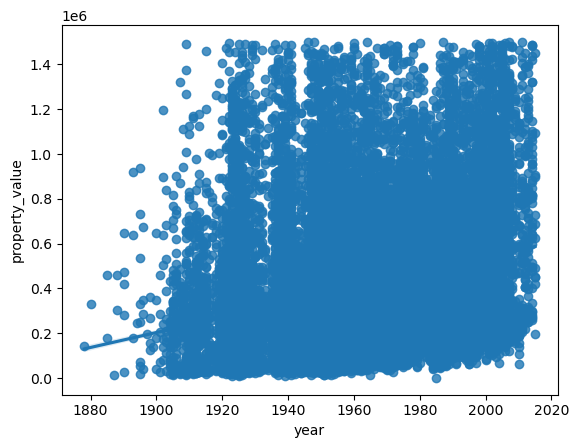

(0.24800794469064283, 0.0)

In [46]:
# Quickly: get a couple more done: year and has_pool
sns.regplot(data=train, x='year', y='property_value')
plt.show()
t, p = pearsonr(train.year, train.property_value)
t, p

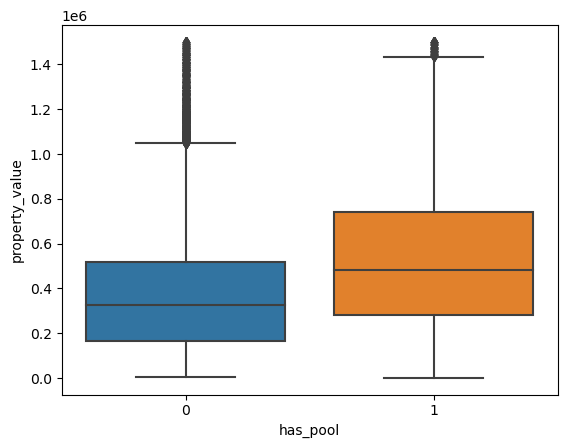

(-301.3657631220334, 0.0)

In [18]:
sns.boxplot(data=df, x='has_pool', y='property_value')
plt.show()
t, p = ttest_ind(df.has_pool, df.property_value)
t, p

In [47]:
print(f'mean value for homes with a pool: {train[train.has_pool == 1].property_value.mean()}')
print(f'mean value for homes with no pool: {train[train.has_pool == 0].property_value.mean()}')
print(f'median value for homes with a pool: {train[train.has_pool == 1].property_value.median()}')
print(f'median value for homes with no pool: {train[train.has_pool == 0].property_value.median()}')

mean value for homes with a pool: 535572.6052726617
mean value for homes with no pool: 381749.88132237096
median value for homes with a pool: 474770.0
median value for homes with no pool: 326191.0


In [20]:
train_scaled.head()

,property_value,bathrooms,bedrooms,has_pool,squarefeet,lotsize_sqft,year,county,county_Orange,county_Ventura
46866,476000,0.20,0.3,0,0.150970,0.099934,0.562044,LA,0,0
43125,567337,0.25,0.4,1,0.256793,0.124719,0.722628,Orange,1,0
38231,419390,0.10,0.2,0,0.081307,0.111912,0.510949,LA,0,0
20644,409000,0.10,0.3,0,0.130133,0.112081,0.547445,LA,0,0
46076,342514,0.30,0.4,0,0.275587,0.390973,0.729927,Orange,1,0


In [33]:
X_columns = ['bathrooms', 'bedrooms', 'has_pool', 'squarefeet', 'lotsize_sqft', 'year', 'county_Orange', 'county_Ventura']
X_train_scaled = train_scaled[X_columns]
y_train = train_scaled.property_value

In [34]:
e.get_kbest_multi(X_train_scaled, y_train)

,Feature,KBest Rank,KBest Scores
0,squarefeet,1,11300.227325
1,bathrooms,2,7741.960642
2,bedrooms,3,1998.099568
3,year,4,1885.363771
4,has_pool,5,1235.193036
5,county_Orange,6,806.462854
6,lotsize_sqft,7,681.953318
7,county_Ventura,8,63.969153


In [35]:
# still not sure about this method (RFE) or maybe this function
e.get_rfe_multi(X_train_scaled, y_train)

,Feature,RFE Rank
3,squarefeet,1
1,bedrooms,2
0,bathrooms,3
4,lotsize_sqft,4
5,year,5
6,county_Orange,6
7,county_Ventura,7
2,has_pool,8


In [37]:
e.select_rfe(X_train_scaled, y_train, 4)

['bathrooms', 'bedrooms', 'squarefeet', 'lotsize_sqft']